# PGM - 2. Markov chains and hidden markov chains

## 1. Генерация текста при помощи марковских цепей

В коде реализован алгоритм генерации текста на основе марковских цепей.
- Реализуйте марковскую цепь более высокого порядка, которая выводит следующее слово не на основании одного предыдующего слова, а на основании n последних.
- Реализуйте алгоритм генерации текста на основе марковской цепи произвольного порядка (можно использовать цепи более низкого порядка для первых слов в предложении и если данный набор из n слов не встречался в обучающей выборке)
- Поэкспериментируйте с генераторами текста. С какого размера входного текста цепь первого порядка генерирует более-менее осмысленные предложения? А цепь второго порядка?

In [1074]:
import random

class Dictogram(dict):
    def __init__(self, iterable=None):
        # Инициализируем наше распределение как новый объект класса, 
        # добавляем имеющиеся элементы
        super(Dictogram, self).__init__()
        self.num_unique_words = 0  # число уникальных ключей в распределении
        self.num_words = 0  # общее количество всех слов в распределении
        if iterable:
            self.update(iterable)

    def update(self, iterable):
        for item in iterable:
            if item in self:
                self[item] += 1
                self.num_words += 1
            else:
                self[item] = 1
                self.num_unique_words += 1
                self.num_words += 1

    def count(self, item):
        if item in self:
            return self[item]
        return 0

    def return_random_word(self):
        random_key = random.sample(self, 1)
        return random_key[0]

    def return_weighted_random_word(self):
        random_int = random.randint(0, self.num_words-1)
        index = 0
        list_of_keys = list(self.keys())
        for i in range(0, self.num_unique_words):
            index += self[list_of_keys[i]]
            if(index > random_int):
                return list_of_keys[i]

In [1071]:
def fit_markov_model(data):
    markov_model = dict()

    for i in range(0, len(data)-1):
        if data[i] in markov_model:
            markov_model[(data[i])].update([data[i+1]])
        else:
            markov_model[(data[i])] = Dictogram([data[i+1]])
    return markov_model

In [1072]:
def fit_higher_order_markov_model(order, data):
    markov_model = dict()

    # your code goes here
    for cur_order in range(1, order + 1):
        for i in range(cur_order, len(data) - 1):
            prev_elements = tuple([data[i-cur_order+k] for k in range(0, cur_order)])
            if prev_elements in markov_model:
                markov_model[prev_elements].update([data[i+1]])
            else:
                markov_model[prev_elements] = Dictogram([data[i+1]])
    
    return markov_model

In [1073]:
def generate_random_sentence(length, markov_model):

    # your code goes here
    q = markov_model.keys()
    order = max(list(map(len,(q))))
    mm_first_order = list(filter(lambda x: len(x) == 1, q))
    first_word = random.sample(mm_first_order, 1)[0]
    
    sentence = [first_word[0], markov_model[first_word].return_weighted_random_word()]
    cur_order = 2
    while len(sentence) < order:
        key = tuple(sentence[len(sentence) - cur_order:])
        if key in markov_model:
            new_word = markov_model[key].return_weighted_random_word()
            sentence.append(new_word)
            cur_order += 1
        else:
            cur_order -= 1
     
    #don't forget about len(seqeunce) - length == 0
    while len(sentence) < length:
        for cur_order in range(order, 1, -1):
            key = tuple(sentence[len(sentence) - cur_order + 1:])
            if key in markov_model:
                new_word = markov_model[key].return_weighted_random_word()
                sentence.append(new_word)
                break

    return ' '.join(sentence)

In [1070]:
list(filter(lambda x: x % 2,[1,2,3]))

[1, 3]

In [5]:
import re
# рандомная книга. Можно взять объединение нескольких книг
with open("Шмелев Иван Сергеевич. Солнце мертвых.txt", "r") as f:
  data = f.read()
# преобразуем текст в list из слов
data = re.sub(r'[^\w]', ' ', data).lower().split()
len(data)

54842

In [6]:
mc = fit_higher_order_markov_model(3, data)
for i in range(25, 26):
  print(generate_random_sentence(i, mc))

погибший еще утро сон видел наталью на а нес руках браслетики штанах после болезни признаем ей горошин ночь надо бояться за у то менингита папа


## 2. Подгоняем под предельное распределение

Пусть у нашей марковской цепи $n$ состояний, которые образуют цикл длины $n$. Пусть также вероятности перехода заданы так: из $k$ состояния мы с веротяностью $p_k$ можем перейти в следующее состояние ($k+1 \mod n$), а с вероятностью $1-p_k$ остаться в том же состоянии $k$. Покажите, что у этой цепи есть предельное состояние при любом начальном распределении. Для любого ли набора 

$$\sum\limits_{k=1}^n \pi_k = 1$$

можно подобрать такие вероятности перехода $p_k$, что предельное состояние марковской цепи станет равным $\pi_k$?

In [1075]:
import numpy as np
pi = np.random.rand(5)
pi = pi / pi.sum()
pi

array([0.03306042, 0.28772507, 0.23559878, 0.17450196, 0.26911377])

In [1076]:
# вставьте свой ответ вместо следующей строки
pk = 1/pi#np.array([0.4,0.4,0.4,0.4,0.4])
pk = pk / pk.sum()

P = np.diag(1-pk) + np.diag(pk[:-1], 1)
P[-1,0] = pk[-1]
P

array([[0.3620549 , 0.6379451 , 0.        , 0.        , 0.        ],
       [0.        , 0.92669831, 0.07330169, 0.        , 0.        ],
       [0.        , 0.        , 0.91048029, 0.08951971, 0.        ],
       [0.        , 0.        , 0.        , 0.87913756, 0.12086244],
       [0.07837107, 0.        , 0.        , 0.        , 0.92162893]])

In [1077]:
# на тестовом примере получается равномерное распределение
np.linalg.matrix_power(P, 1000)

array([[0.03306042, 0.28772507, 0.23559878, 0.17450196, 0.26911377],
       [0.03306042, 0.28772507, 0.23559878, 0.17450196, 0.26911377],
       [0.03306042, 0.28772507, 0.23559878, 0.17450196, 0.26911377],
       [0.03306042, 0.28772507, 0.23559878, 0.17450196, 0.26911377],
       [0.03306042, 0.28772507, 0.23559878, 0.17450196, 0.26911377]])

## 3. Алгоритмы на бандитах

Пусть у нас есть $N$ действий, которые приводят к случайной награде, распределенной как $\mathcal{N}(m_i, \sigma_i^2)$. Реализуйте алгоритмы, указанные ниже, и отрисуйте  их накопленную награду и regret

In [23]:
import numpy as np
from matplotlib import pyplot as plt

In [24]:
class Bandit:
  def __call__(self) -> float:
    pass 

class GaussBandit(Bandit):
  def __init__(self, mu: float, sigma: float):
    self.mu = mu
    self.sigma = sigma

  def __call__(self) -> float:
    reward = np.random.normal(self.mu, self.sigma)
    return reward

In [25]:
class Algorithm:
  def __init__(self, N: int):
    """
    N - number of bandits
    """
    self.N = N
    pass

  def choose(self) -> int:
    """
    Choosing bandit from 0 to N-1
    """
    pass

  def update(self, n: int, reward: float):
    """
    Getting feedback.
    n: number of bandit from 0 to N-1
    reward: obtained value of reward
    """
    pass

In [26]:
class Monkey(Algorithm):
  def choose(self):
    return np.random.randint(self.N)

In [168]:
class EpsilonGreedy(Algorithm):
    def __init__(self, N:int, eps:float = 0.05):
        super().__init__(N)
        self.eps = eps
        self.T_storage = []
        self.Q_storage = np.zeros((N, 2)) # storage of avarage result on two last steps
        self.init_bandit = 0
    
    def init_storages(self):
        self.T_storage.append(1.0)
        result = self.init_bandit
        self.init_bandit += 1
        return result
        
    
    def choose(self) -> int:
        choose = np.random.binomial(1, self.eps)
        if choose:
            self.cur_bandit = np.random.randint(self.N)
            result = self.cur_bandit
        else:
            if self.init_bandit < len(self.Q_storage):
                self.cur_bandit = self.init_bandit
                result = self.init_storages()
            else:
                self.cur_bandit = np.argmax(self.Q_storage[:, -1], axis = 0)
                self.T_storage[self.cur_bandit] += 1
                result = self.cur_bandit
                
        return result
    
    def update(self, n: int, reward: float):
        if self.init_bandit < len(self.Q_storage):
            self.Q_storage[n][1] = reward
        else:
            self.Q_storage[n][0] = self.Q_storage[n][1]
            self.Q_storage[n][1] = reward / self.T_storage[n] + (self.T_storage[n] - 1)*self.Q_storage[n][0]
            
        

In [1058]:
class UCB(Algorithm):
  # your code here
    def __init__(self, N:int, delta:list = None):
        super().__init__(N)
        self.delta = [0.001]*N if delta is None else delta
        self.T_storage = np.zeros((N))
        self.Q_storage = np.zeros((N, 2)) # storage of avarage result on two last steps
        self.f_opt = np.zeros((N))
        self.init_bandit = 0
    
    def init_storages(self):
        result = self.init_bandit
        self.T_storage[self.init_bandit] += 1
        self.init_bandit += 1
        return result
        
    
    def choose(self) -> int:
        if self.init_bandit < len(self.Q_storage):
            self.cur_bandit = self.init_bandit
            result = self.init_storages()
        else:
            self.cur_bandit = np.argmax(self.f_opt)
            self.T_storage[self.cur_bandit] += 1
            result = self.cur_bandit
                
        return result
    
    def update(self, n: int, reward: float):
        if self.init_bandit < len(self.Q_storage):
            self.Q_storage[n][1] = reward
        else:
            self.Q_storage[n][0] = self.Q_storage[n][1]
            self.Q_storage[n][1] = reward / self.T_storage[n] + (self.T_storage[n] - 1)*self.Q_storage[n][0]
        coef = self.delta[n]
        self.f_opt[n] = self.Q_storage[n][1] + np.sqrt(2*np.log(1 / coef)/self.T_storage[n])

In [1059]:
class Tompson(Algorithm):
  # your code here
  def __init__(self, N: int):
    self.N = N
    self.mu = np.zeros((N,))
    self.var = np.ones((N,))
    self.ap_mu = 0
    self.ap_var = 1
    self.rewards = np.array([])

  def choose(self) -> int:
    param = np.random.normal(self.mu, np.sqrt(self.var))
    result = np.argmax(param)
    return np.round(result)

  def update(self, n: int, reward: float):
    self.rewards = np.append(self.rewards, reward)
    if self.rewards.shape[0] > 1:
        self.ap_mu = self.rewards.mean()
        self.ap_var = self.rewards.var()
        n = self.rewards.shape[0]
        new_var = 1/ (1 / self.ap_var + n / self.var)
        n=-1
        self.mu[n] = (self.ap_mu / self.ap_var + self.rewards.sum() / self.var[n]) * new_var[n]
        self.var[n] = new_var[n]

In [1060]:
def run_experiment(
    bandits: list,
    algorithm: Algorithm,
    steps: int = 1000
):
  """
  bandits: list[Bandit]
  """ 
  reward_history = []

  for n_step in range(steps):
    action = algorithm.choose()
    choosed_bandit = bandits[action]
    reward = choosed_bandit()
    algorithm.update(action, reward)

    reward_history.append(reward)

  reward_history = np.cumsum(reward_history)
  
  return reward_history

C:\Temp/ipykernel_7520/1088348624.py:22: RuntimeWarning: overflow encountered in true_divide
  new_var = 1/ (1 / self.ap_var + n / self.var)
C:\Temp/ipykernel_7520/1088348624.py:24: RuntimeWarning: overflow encountered in double_scalars
  self.mu[n] = (self.ap_mu / self.ap_var + self.rewards.sum() / self.var[n]) * new_var[n]
C:\Temp/ipykernel_7520/1088348624.py:24: RuntimeWarning: invalid value encountered in double_scalars
  self.mu[n] = (self.ap_mu / self.ap_var + self.rewards.sum() / self.var[n]) * new_var[n]
C:\Temp/ipykernel_7520/1088348624.py:22: RuntimeWarning: divide by zero encountered in true_divide
  new_var = 1/ (1 / self.ap_var + n / self.var)
C:\Temp/ipykernel_7520/1088348624.py:24: RuntimeWarning: divide by zero encountered in double_scalars
  self.mu[n] = (self.ap_mu / self.ap_var + self.rewards.sum() / self.var[n]) * new_var[n]
No handles with labels found to put in legend.


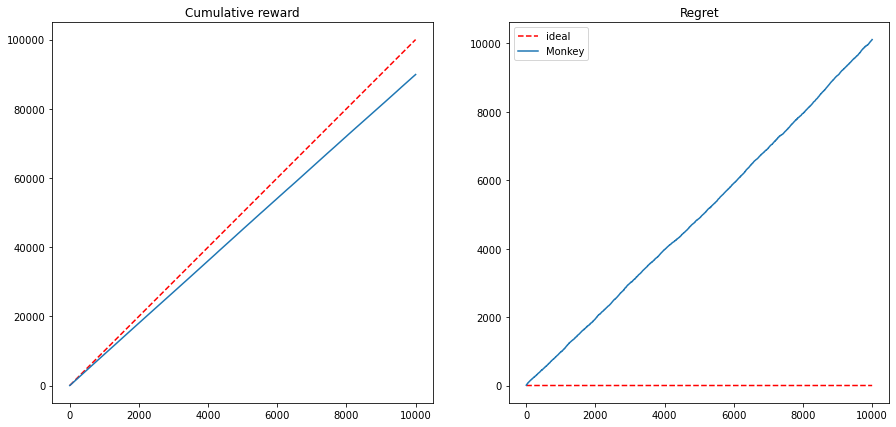

In [1063]:
bandits = [
    GaussBandit(i, 1) for i in range(10)
]
algorithm = Tompson(10)
#algorithm = UCB(10)
#algorithm = EpsilonGreedy(10)
steps = 10000

reward_history = run_experiment(bandits, algorithm, steps)
regret = 10 * np.arange(1, steps + 1) - reward_history

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

ax = axes[0]
ax.set_title("Cumulative reward")
ax.plot(np.arange(steps), 10 * np.arange(steps), "--r", label="ideal")
ax.plot(reward_history, label="Monkey")
plt.legend()

ax = axes[1]
ax.set_title("Regret")
ax.plot(np.arange(steps), np.zeros(steps), "--r", label="ideal")
ax.plot(regret, label="Monkey")
plt.legend()

In [1064]:
reward_history[-1]

89889.88435443578

## 4. Бизнес

Представьте, что вы продаете какой-то товар на онлайн площадке, и хотите оптимизировать цену для максимизации получаемой прибыли. Вы можете выставить любую цену на свой товар, и наблюдать, сколько он получает просмотров и покупок. 

Поскольку число просмотров вы контроллировать не можете, то логично взять отношение покупок к просмотрам $\alpha$ (будем называть эту величину конверсией), и умножить ее на получаемую прибыть с одной покупки, которая равна $p - p_0$, где $p$ - цена за товар, а $p_0$ - его себестоимость.

Таким образом, вы хотите решить оптимизационную задачу

$$\alpha(p) \cdot (p - p_0) \to \max\limits_p$$

где функцию $\alpha$ (вообще говоря, случайную) вы не знаете, но можете оценить, выставляя разную цену. Для удобства давайте считать, что вы выставляете цену $p_t$ раз в день, и вечером получаете реацию $\alpha_t = \alpha(p_t)$ и награду $\alpha_t (p_t - p_0)$.

Допустим, вы решили моделировать спрос при помощи экспоненциального распределения, то есть предполагаете, что при цене $p$ покупатель, зашедший к вам на страницу купит товар с вероятностью $\exp(- \lambda p)$, где $\lambda$ - некоторая константа, не зависящая ни от цены, ни от номера дня $t$. 


В такой постановке задачи можно в качестве возможных **действий** использовать не множество цен, а множество возможных $\lambda$. То есть вы выбираете одну из моделей спроса, действуете исходя из нее и получаете в конце дня некую прибыль. Тогда выбор модели - это action, а прибыль - reward. 

- Реализуйте предложенный алгоритм
- Найдите теоретически оптимальную цену и отрисуйте график регрета получившегося алгоритма. Растет ли он быстрее/медленнее линейной функции?
- Оцените время сходимости в зависимости от количества покупок в день
- прочитайте эту любопытную статью про динамическое ценообразование: https://blog.griddynamics.com/dynamic-pricing-algorithms/

In [1078]:
import numpy as np
from matplotlib import pyplot as plt

In [1079]:
real_lambda = 1 / 42

def get_real_conversion(price, n_people):
  prob_of_buying = np.exp(-price * real_lambda)
  n_buys = np.random.binomial(n_people, prob_of_buying)
  return n_buys * 1.0 / n_people

In [1080]:
possible_lambdas = 1.0 / np.arange(1, 101)
apriory_probs = np.ones_like(possible_lambdas)
apriory_probs = apriory_probs / apriory_probs.sum()

In [1081]:
np.random.gamma(np.array([2.5, 0.2, 0.3]),10)

array([1.73199881e+01, 6.52269169e-04, 2.02419887e+00])

In [1082]:
class ThompsonDemand:
  def __init__(self, possible_lambdas, apriory_probs, n_people):
    self.lambdas = possible_lambdas
    self.probs = apriory_probs
    self.n_people = n_people
    self.history  = []
  
  def update(self, price: float, conversion: float):
    # your code here
    self.probs[self.cur_lambda] += conversion*self.n_people
    self.n_people +=1

  def suggest_price(self):
    # your code here
    #Скорее всего, тут предполагалось другое априорное распределение, но сел поздно и времении не было, чтобы написать (:
    param = np.random.gamma(self.probs, self.n_people)
    self.cur_lambda = np.argmax(param)
    self.sug_price = np.random.exponential(1/self.lambdas[self.cur_lambda])
    self.history.append(self.cur_lambda)
    return self.sug_price

In [1096]:
def run_business(
    days: int = 1000,
    n_people: int = 10, # how many people views your product per day
):
  """
  bandits: list[Bandit]
  """ 
  ai_manager = ThompsonDemand(possible_lambdas, apriory_probs, n_people)

  reward_history = []

  for n_day in range(days):
    price = ai_manager.suggest_price()
    conversion = get_real_conversion(price, n_people)

    ai_manager.update(price, conversion)

    reward = price * conversion
    reward_history.append(reward)
    
  reward_history = np.cumsum(reward_history)
  return reward_history

In [1098]:
run_business()

array([   16.31070821,    28.07877199,    40.61702214,    48.86717102,
          48.86717102,    66.80112161,    70.95318053,    74.90139946,
          91.3854707 ,   102.7540634 ,   118.88223625,   131.99021813,
         148.59582417,   169.77627853,   179.28257546,   189.0419985 ,
         195.19907109,   203.12696897,   207.6662244 ,   224.46628175,
         224.46628175,   236.17337149,   246.20364219,   263.68566232,
         265.35265232,   267.01122359,   270.50450925,   282.64007457,
         282.64007457,   289.09846802,   305.56463775,   311.24156897,
         325.63288111,   339.67677616,   339.67677616,   348.22008079,
         365.41493496,   375.07963553,   384.04266813,   384.04266813,
         392.45090863,   410.43423034,   417.24377839,   422.90274453,
         422.90274453,   422.90274453,   455.3490379 ,   470.19877061,
         473.45943445,   474.72660182,   476.55467122,   485.04318739,
         494.78106914,   503.45109798,   516.06468678,   520.55100513,
      